In [2]:
import json

token = {
  "username": "manhnguyen1912",
  "key": "KGAT_cee31f61cbd9b5b1d09853c03f8a3208"
}

with open("/content/kaggle.json", "w") as f:
    json.dump(token, f)


In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!pip uninstall kaggle -y
!pip uninstall kagglesdk -y


Found existing installation: kaggle 1.7.4.5
Uninstalling kaggle-1.7.4.5:
  Successfully uninstalled kaggle-1.7.4.5


In [4]:
!pip install kaggle --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.4/86.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.0/189.0 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 5.5 MB/s eta 0:00:00


In [5]:
!kaggle datasets download -d younesselbrag/lung-nodules-detection-dataset-annotations


Dataset URL: https://www.kaggle.com/datasets/younesselbrag/lung-nodules-detection-dataset-annotations
License(s): other
  0% 0.00/7.03M [00:00<?, ?B/s]
100% 7.03M/7.03M [00:00<00:00, 78.8MB/s]


In [6]:
!unzip -q /content/lung-nodules-detection-dataset-annotations.zip

In [7]:
!pip install -q ultralytics --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.5 MB/s eta 0:00:00


In [22]:
%%writefile data.yaml
path: /content/ct_images
train: images/train
val: images/val

nc: 2
names:
  - khoi_u_0
  - khoi_u_1



Overwriting data.yaml


In [23]:
!cat data.yaml


path: /content/ct_images
train: images/train
val: images/val

nc: 2
names:
  - khoi_u_0
  - khoi_u_1



In [24]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

model.train(
    data="data.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    device=0,
    workers=2
  )


Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c66ba21fa70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804


image 1/1 /content/ct_images/images/val/300_jpg.rf.195698cfa1d0f4e7caf98507d9aa3167.jpg: 640x640 1 khoi_u_0, 9.0ms
Speed: 2.6ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


(np.float64(-0.5), np.float64(415.5), np.float64(415.5), np.float64(-0.5))

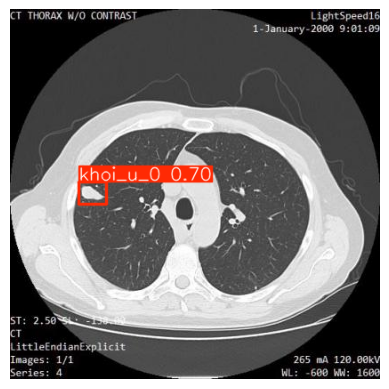

In [26]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load model
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Dự đoán trên một ảnh
results = model.predict(
    source="/content/ct_images/images/val/300_jpg.rf.195698cfa1d0f4e7caf98507d9aa3167.jpg",
    conf=0.25
)

# HIỂN THỊ KẾT QUẢ (thay cho results[0].show())
img = results[0].plot()   # YOLO vẽ bounding box vào ảnh
plt.imshow(img)
plt.axis("off")



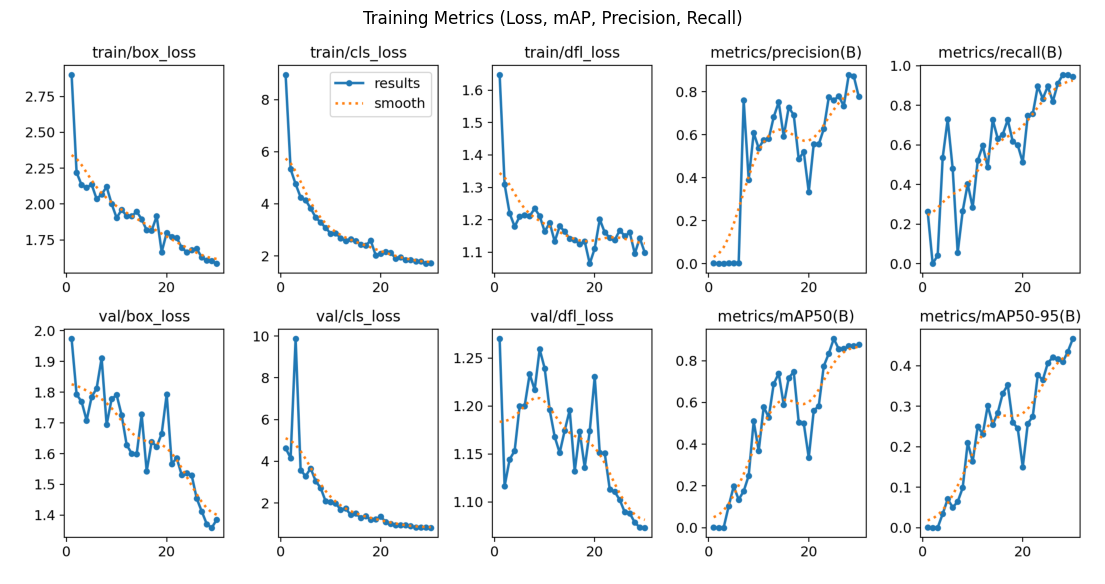

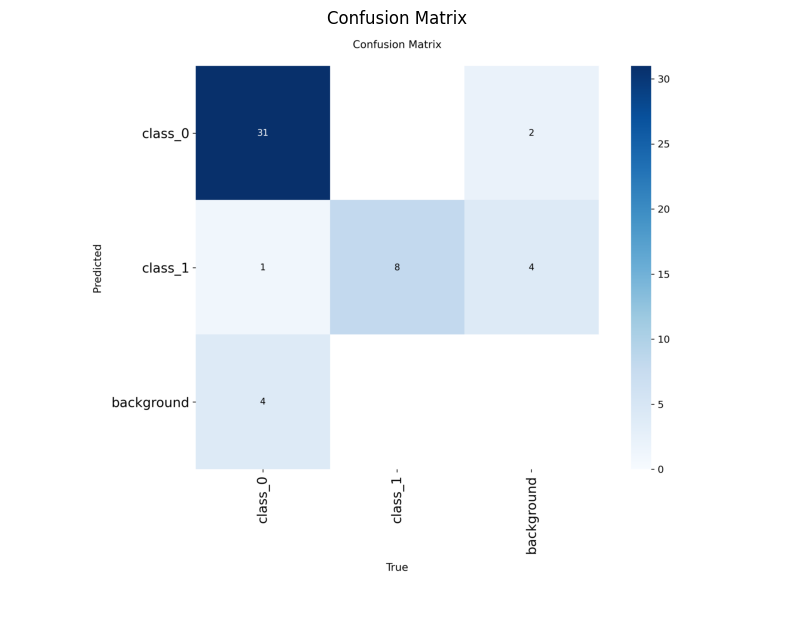

In [14]:
import matplotlib.pyplot as plt
import cv2
import os

base_path = "/content/runs/detect/train"
# Hiển thị results.png
results_img = cv2.imread(os.path.join(base_path, "results.png"))
results_img = cv2.cvtColor(results_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(14, 8))
plt.imshow(results_img)
plt.title("Training Metrics (Loss, mAP, Precision, Recall)")
plt.axis("off")
plt.show()


# Hiển thị confusion_matrix.png
cm_img = cv2.imread(os.path.join(base_path, "confusion_matrix.png"))
cm_img = cv2.cvtColor(cm_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(cm_img)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()
